# Fashion-MNIST数据集进行图像分类

## 一、模型一 利用keras构造神经网络模型

## 1.获取Fashion MNIST数据集
#### Fashion MNIST数据集包含10个类别中的70,000个灰度图像，图像显示了低分辨率（28 x 28像素）的单件服装，如下所示：

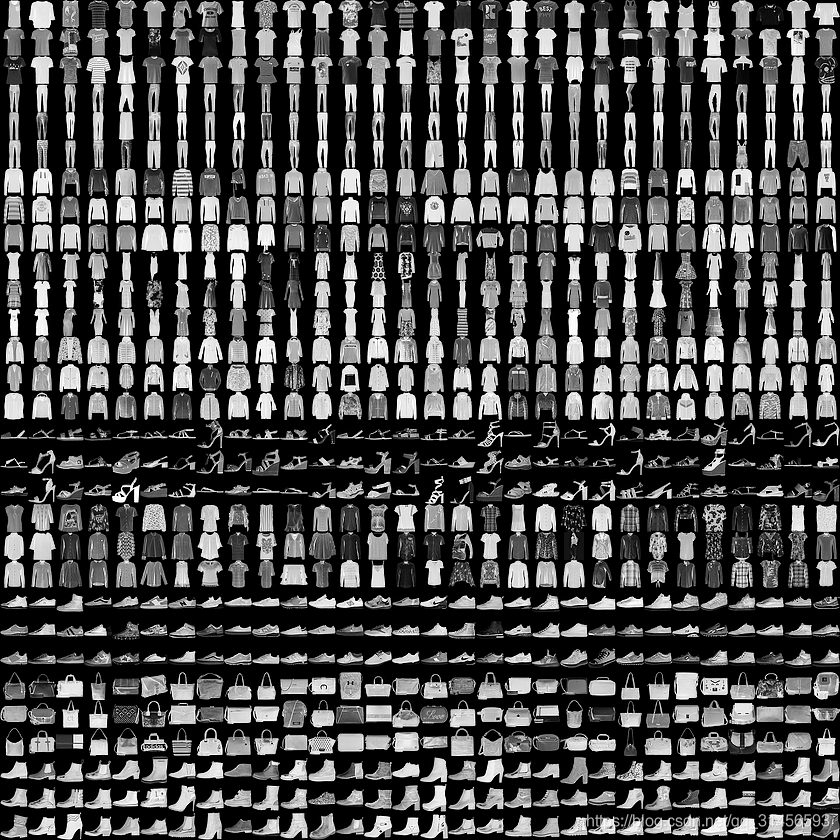

#### 导入所需要的模块

In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tqdm import tqdm_notebook as tqdm
from tensorflow.keras.utils import plot_model

In [2]:
import os
import time
import math
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import win_unicode_console
win_unicode_console.enable()

C:\Users\win10\anaconda3\lib\site-packages\win_unicode_console\__init__.py:31: RuntimeWarning: sys.stdin.encoding == 'gbk', whereas sys.stdout.encoding == 'UTF-8', readline hook consumer may assume they are the same
  readline_hook.enable(use_pyreadline=use_pyreadline)


#### 我们将使用60,000张图像来训练网络和10,000张图像，以评估网络学习图像分类的准确程度。

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()    #下载数据

## 2.探索数据
#### 图像是28x28 NumPy数组，像素值介于0到255之间。标签是一个整数数组，范围从0到9.这些对应于图像所代表的服装类别：

In [4]:
data = {"Label":[0,1,2,3,4,5,6,7,8,9],"Class":["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot" ]}
df=pd.DataFrame(data)
df

,Label,Class
0,0,T-shirt/top
1,1,Trouser
2,2,Pullover
3,3,Dress
4,4,Coat
5,5,Sandal
6,6,Shirt
7,7,Sneaker
8,8,Bag
9,9,Ankle boot


#### 每个图像都映射到一个标签。 由于类名不包含在数据集中，因此将它们存储在此处以便在绘制图像时使用：

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']    #查看标签

#### 让我们在训练模型之前探索数据集的格式。 以下显示训练集中有60,000个图像，每个图像表示为28 x 28像素：

In [6]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## 3.处理数据
#### 3.1数据可视化

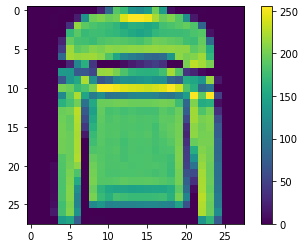

In [7]:
plt.figure()
plt.imshow(train_images[5])    #随便查看一个图
plt.colorbar()
plt.grid(False)
plt.show()

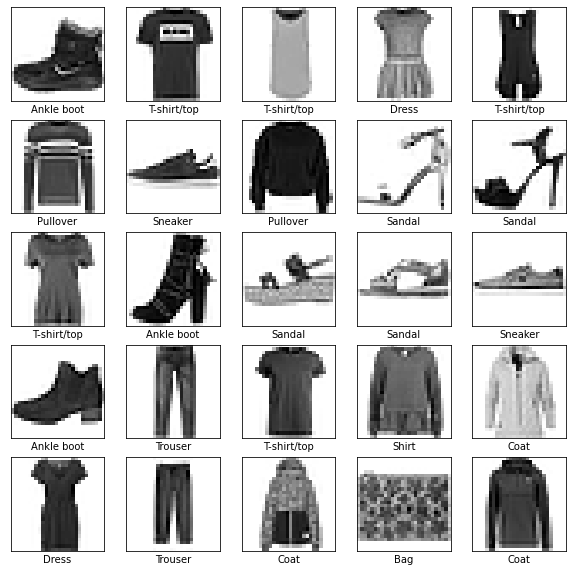

In [8]:
plt.figure(figsize=(10,10))    #验证数据集标签的正确性，查看一下前25张图片，将标签显示在图片的下方
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#### 3.2数据归一化
#### 进行数据归一化，使得样本值都处于0到1之间。

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## 4.构造网络

### 4.1 构造层
神经网络的基本构件是层(layer)，层从输入数据提取表现(representations)，希望这些表现能够对现有问题有所帮助。
#### 第一层，转换图像格式： 将二维(28*28)的图像数组转为一维(28*28=784)，这层没有学习参数，只是格式数据。在像素被压平(flatten)之后,接下来是两个keras.layers.Dense层，它们是紧密连接、或完全连接的神经层。
#### 第二层，128个节点(nodes or neurons) 
#### 第三层，10个节点的softmax层， 输出10个可能的分数，加在一起和为1，表示10个分类的可能性分数激活函数：relu，softmax

In [10]:
model = keras.Sequential(
[
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

### 4.2 编译模型
#### 在训练模型前，有一些设置需要在编译模型

In [11]:
#编译模型
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## 5.模型训练与验证

### 5.1 模型训练
#### 1、将训练数据输入模型， 本例中的图像和标签
#### 2、模型学习将图像和标签联系起来
#### 3、通过测试集验证模型的准确性

In [12]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6251 - accuracy: 0.7809
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3762 - accuracy: 0.8650
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3341 - accuracy: 0.8771
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3099 - accuracy: 0.8860
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2900 - accuracy: 0.8929


### 5.2 评估准确性

In [13]:
# 评估模型， 使用测试集评估
score = model.evaluate(test_images, test_labels)
# 输出准确率
print( 'n', 'Test accuracy:',score[1])

313/313 [==============================] - 1s 1ms/step - loss: 0.3649 - accuracy: 0.8690
n Test accuracy: 0.8690000176429749


#### 得出模型准确度为0.8735

## 6.模型预测

In [14]:
predictions = model.predict(test_images)
print(predictions[0])    # 10个评分，表示10个分类的可能性
print(np.argmax(predictions[0]),test_labels[0])    # 预测值与标签值

[9.1666489e-06 1.7451280e-06 1.0059172e-06 1.7156719e-06 8.2774131e-06
 4.4863693e-02 8.6604450e-06 9.2015773e-02 3.1755134e-04 8.6277235e-01]
9 9


### 6.1通过绘制图像显示10个分类

In [15]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#### 6.1.1、显示第一个图像
#### 正确预测标签显示蓝色，错误预测标签显示红色

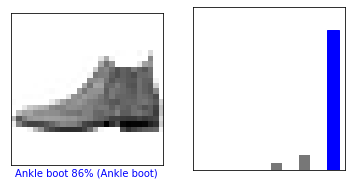

In [16]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

#### 6.1.2、显示更多图片的预测

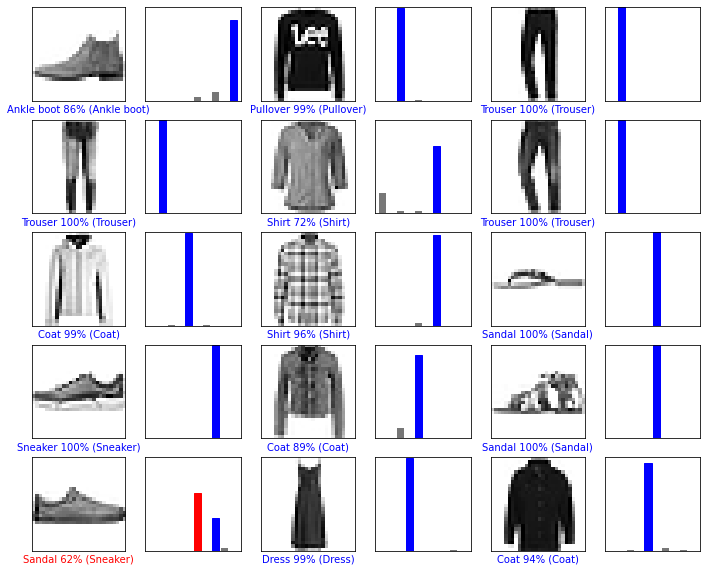

In [17]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

(1, 28, 28)
[[9.1666489e-06 1.7451330e-06 1.0059182e-06 1.7156735e-06 8.2774213e-06
  4.4863716e-02 8.6604450e-06 9.2015788e-02 3.1755152e-04 8.6277235e-01]]


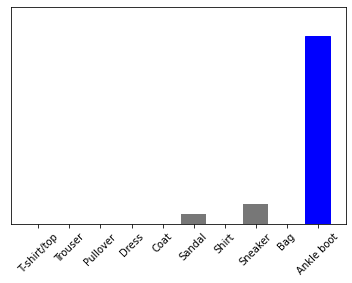

In [18]:
img = test_images[0]
img = (np.expand_dims(img,0))
print(img.shape)
predictions_single = model.predict(img)

print(predictions_single)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

## 二、模型二 CNN神经网络模型

## 1.数据预处理
#### 采用交叉验证的方法，交叉验证可以缓解单独测试结果的片面性和训练数据不足的问题。
#### 在数据预处理之后，需要对数据进行切分，切分为训练集和验证集以及测试集。将50000张测试集的数据中切割48000张图片进行训练，将2000张图片进行测试，最后将10000张图进行测试。

In [19]:
#数据预处理
def pretreatment():
    '''
    @introduction：数据预处理，将数据归一化，如果必要，可以进行数据混洗；其次将数据分割               
    @return : 
               x_train 训练数据
               y_train 训练数据标签
               x_valid 验证数据
               y_valid 验证数据标签
               x_test 测试数据
               y_test 测试数据标签
    '''
    np.set_printoptions(threshold=np.inf)    #控制台输出所有的值，不需要省略号
    fashion = tf.keras.datasets.fashion_mnist
    (x_train, y_train), (x_test, y_test) = fashion.load_data()
    x_train = x_train.reshape([-1,28,28,1])/255.0
    x_test = x_test.reshape([-1,28,28,1])/255.0

    #数据集切分
    x_valid,x_train=x_train[:2000],x_train[2000:]
    y_valid,y_train=y_train[:2000],y_train[2000:]
    return x_valid,x_train,y_valid,y_train,x_test,y_test

## 2.模型训练

### 2.1 定义网络

In [20]:
#模型训练
def model_train(x_train,y_train,x_valid,y_valid,choice=False):
    '''
    @introduction：训练模型，根据需求保存模型
    @parameter:   
               x_train 训练数据
               y_train 训练数据标签
               x_valid 验证数据
               y_valid 验证标签
               choice 选择是否读取保存的模型，默认值为不读取
               
    @return : model和history
    '''
    
    #模型处理
    def model_read(model):
        
        save_path = "CNN_new_model.h5"
        if os.path.exists(save_path):#判断文件是否存在
            print('\n')
            print('-------------------******模型读入*****----------------------')
            model=tf.keras.models.load_model(save_path)  
        else:
            print('文件不存在')
        return model
    def model_save(model):
        save_path = "CNN_new_model.h5"
        model.save(save_path)
    
    #模型定义
    model = keras.Sequential([   
        #(-1,28,28,1)->(-1,28,28,32)    
        keras.layers.Conv2D(input_shape=(28, 28, 1),filters=32,kernel_size=5,strides=1,padding='same'),     # Padding method),    
        #(-1,28,28,32)->(-1,14,14,32)    
        keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same'),    
        #(-1,14,14,32)->(-1,14,14,64)    
        keras.layers.Conv2D(filters=64,kernel_size=3,strides=1,padding='same'),     # Padding method),    #(-1,14,14,64)->(-1,7,7,64)   
        keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same'),    
        #(-1,7,7,64)->(-1,7*7*64)    
        keras.layers.Flatten(),    
        #(-1,7*7*64)->(-1,256)    
        keras.layers.Dense(256, activation=tf.nn.relu),    
        #(-1,256)->(-1,10)    
        keras.layers.Dense(10, activation=tf.nn.softmax)])
    model.summary()
  
    
    #配置参数
    #引入指数衰减学习率或不引入
    ad1 = tf.keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    ad2 = 'adam'
    model.compile(optimizer=ad2,
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])
    
    if choice:
        model=model_read(model)
        history = model.fit(x_train, y_train , batch_size=128, epochs=2, validation_data=(x_valid, y_valid), validation_freq=1)
        #history = model.fit(x_train, y_train, epochs=2, validation_data=(x_valid, y_valid))
        model_save(model)
    else:
        history = model.fit(x_train, y_train,epochs=5, validation_data=(x_valid, y_valid))
        model_save(model)
    return history,model

### 2.2 模型读取

In [21]:
def model_get():
    '''
    @introduction: 模型读取
    @return: model 已经训练好的模型
    '''
    save_path = "CNN_model.h5"
    if os.path.exists(save_path):#判断文件是否存在
        print('\n>>>>>>>>>>>>模型读入>>>>>>>>>>>>>>>>>>>\n')
        model=tf.keras.models.load_model(save_path)  
        plot_model(model, to_file='CNN_model.jpg',show_shapes=True)
        for i in tqdm(range(100)):
            if(i==99):
                print('模型读入成功！')
    else:
        print('文件不存在')
    return model

In [22]:
#数据可视化
def figshow(history):
    '''
    introductoin:  数据可视化，画出训练损失函数和验证集上的准确率
    '''
    # 显示训练集和验证集的acc和loss曲线
    print('\n\n\n')
    print('----------------------------------------------图像绘制-------------------------------------')
    acc = history.history['sparse_categorical_accuracy']
    val_acc = history.history['val_sparse_categorical_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.subplots(figsize=(8,6))
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

    plt.subplots(figsize=(8,6))
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

### 2.3 模型测试

In [27]:
#测试集测试
def data_test(x_test,y_test,model):
    '''
    @introduction :输出模型在测试集上的top1准确率和top2准确率
    @parameter ：
               x_test  测试集数据
               y_test  测试数据标签
               model   训练好的模型
    @return :
              top1_acc   top1标准下的准确率
              top2_acc   top2标准下的准确率
    
    '''
    print('****************************test******************************')
    loss, acc = model.evaluate(x_test, y_test)
    top1_acc = acc
    
    #print("test_accuracy:{:5.2f}%".format(100 * acc))
    y_pred = model.predict(x_test)
    k_b = tf.math.top_k(y_pred,2).indices
    idx=0
    acc=0.0
    for i in k_b:
        if y_test[idx] in i.numpy():
            acc=acc+1
        idx=idx+1
    top2_acc=acc/y_test.shape[0] 
    print('top1准确率：{0}\ntop2准确率：{1}'.format(top1_acc,top2_acc))
    return top1_acc,top2_acc

#随机测试20张图片
def random_test(x_test,y_test,model):
    '''
    @introduction: 产生20个不同整数作为下标索引，输出预测值与真实值，两者比较
    @parameter : x_test  测试集数据
                 y_test  测试集标签
                 model  训练好的模型
    
    '''
    def randomNums(a, b, n):#产生n个不同的随机整数
        all_num = list(range(a, b))
        res = []

        while n:
            np.random.seed(0)
            index = math.floor(np.random.uniform() * len(all_num))
            res.append(all_num[index])
            del all_num[index]
            n -= 1
        return res
    test_idx = randomNums(0, 10000,20)  #测试集大小为10000，索引范围是[0,10000)
    pred_img=[]  #预测的图片
    d_label=[]   #预测图片的标签
    for i in test_idx:
        pred_img.append(x_test[i])
        d_label.append(y_test[i])
    pred_img = np.array(pred_img)#转换为ndarray格式
    pred_prob = model.predict(pred_img)  #预测概率
    pred_label = np.argmax(pred_prob,1)  #索引

    labels = ['T恤','裤子','套头衫','连衣裙','外套','凉鞋','衬衫','运动鞋','包','靴子']
    plt.figure(figsize=(14,14)) 
    #显示前10张图像，并在图像上显示类别
    for i in range(20):   
        plt.subplot(4,5,i+1)
        plt.grid(False)
        plt.imshow(pred_img[i,:,:,0],cmap=plt.cm.binary)
        plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
        t = labels[pred_label[i]]+'('+labels[d_label[i]]+')'
        plt.title(t) 
    plt.show()    

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               803072    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

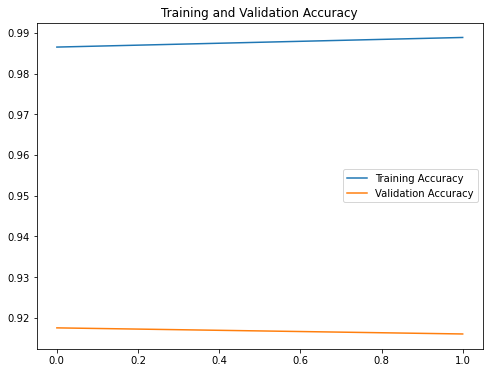

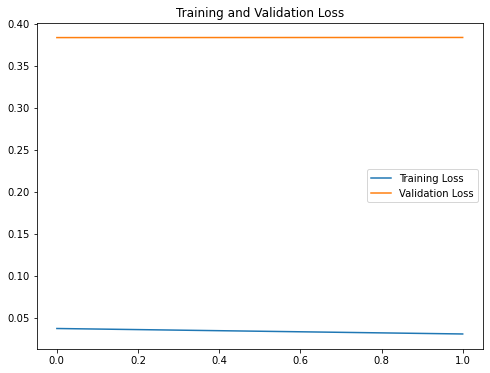

****************************test******************************
313/313 [==============================] - 3s 10ms/step - loss: 0.4284 - sparse_categorical_accuracy: 0.9134
top1准确率：0.9133999943733215
top2准确率：0.9767


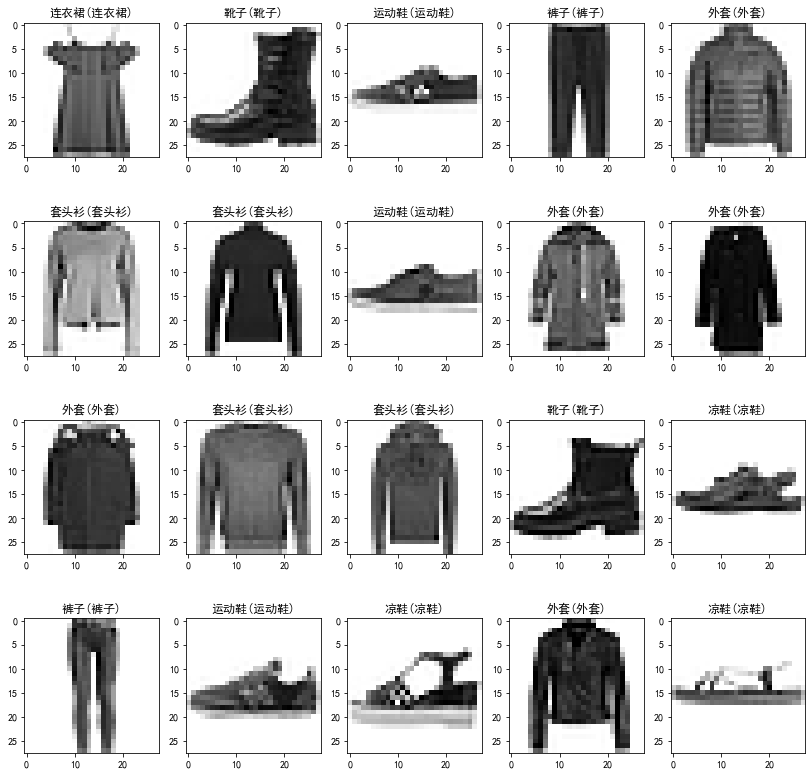

In [28]:
if __name__ == '__main__':

    x_valid,x_train,y_valid,y_train,x_test,y_test = pretreatment()
    #model = model_get()
     history,model = model_train(x_train,y_train,x_valid,y_valid,True)
    #history,model = model_train(x_train,y_train,x_valid,y_valid)
    figshow(history)
    data_test(x_test,y_test,model)
    
    random_test(x_test,y_test,model)

## 3.模型训练得出结果

### 3.1 最终模型准确率
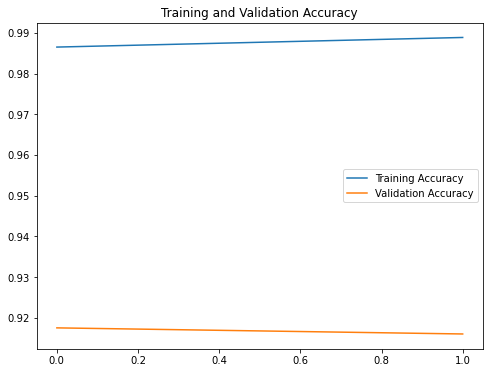

### 3.2 最终模型Top1和Top2准确率
#### top1准确率：0.9133999943733215
#### top2准确率：0.9767

### 3.3 随机输出模型预测
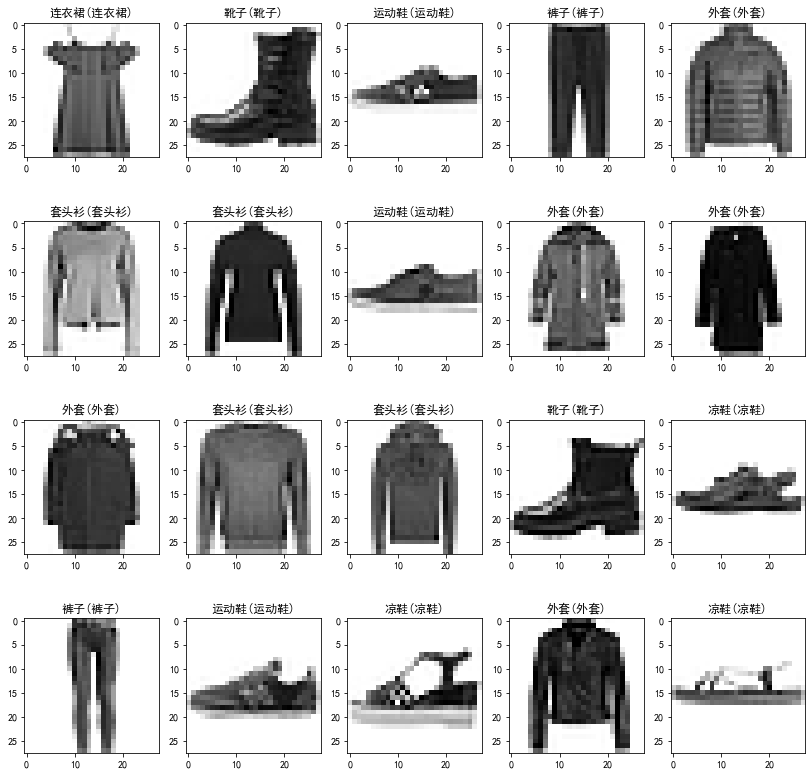